In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
import os

In [4]:
df = pd.read_csv('../DataSets/tweet_sentiment1.csv', encoding='latin-1')

In [5]:
df.head()

,Unnamed: 0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
cols = ['Unnamed','sentiment','id','date','query_string','user','text']
BASE_DIR = ''
df = pd.read_csv(os.path.join(BASE_DIR,'../DataSets/tweet_sentiment1.csv'),encoding='latin-1',names = cols)


In [7]:
df = df.drop(columns='Unnamed')

In [8]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800001 entries, 0 to 800000
Data columns (total 6 columns):
sentiment       800001 non-null int64
id              800001 non-null int64
date            800001 non-null object
query_string    800001 non-null object
user            800001 non-null object
text            800001 non-null object
dtypes: int64(2), object(4)
memory usage: 36.6+ MB


In [10]:
df.isnull().sum()

sentiment       0
id              0
date            0
query_string    0
user            0
text            0
dtype: int64

In [11]:
df.columns.tolist()

['sentiment', 'id', 'date', 'query_string', 'user', 'text']

In [12]:
df.sentiment.value_counts()


0    400001
4    400000
Name: sentiment, dtype: int64

### Sentiment-    0: "Negative",  4: "Positive"

# Text_preprocessing

In [13]:
from nltk.tokenize import RegexpTokenizer

In [14]:
def hashtags(text):
    hash = re.findall(r"#(\w+)",text)
    return hash

In [15]:
def remove_user(text):
    text = re.sub('@[A-Za-z]+[A-Za-z0-9-_]+','',text)
    return text

In [16]:
def remove_links(tweet):
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

In [17]:
def clean_html(text):
  html = re.compile('<.*?>')#regex
  return html.sub(r'',text)

In [18]:
def non_ascii(text):
    return "".join(i for i in text if ord(i)<128)

In [19]:
def removeStopWords(str):
#select english stopwords
  cachedStopWords = set(stopwords.words("english"))
#add custom words
  cachedStopWords.update(('and','I','A','http','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these','mailto','regards','ayanna','like','email'))
#remove stop words
  new_str = ' '.join([word for word in str.split() if word not in cachedStopWords]) 
  return new_str

In [20]:
def email_add(text):
    email = re.compile(r'[\w\.-]+@[\w\.-]+')
    return email.sub(r'',text)

In [21]:
def remove_special_chars(text):
    chars = r'[^a-zA-Z0-9.,!?/:;\'\"\s]'
    return re.sub(chars,'',text)

In [22]:
def punct(text):
    token = RegexpTokenizer(r'\w+')
    text = token.tokenize(text)
    text = ' '.join(text)
    return text

In [23]:
def remove_digits(text):
    pattern = r'[^A-Za-z.,!?/:;\"\'\s]'
    return re.sub(pattern, '',text)

In [24]:
df['hashtag']  = df.text.apply(func =hashtags)


In [28]:
df['new_tweet'] = df.text.apply(func = remove_user)


In [29]:
df['new_tweet'] = df.new_tweet.apply(func = clean_html)


In [30]:
df['new_tweet'] = df.new_tweet.apply(func = non_ascii)


In [31]:
df['new_tweet'] = df.new_tweet.apply(func = email_add)


In [32]:
df['new_tweet'] = df.new_tweet.apply(func = removeStopWords)


In [33]:
df['new_tweet'] = df.new_tweet.apply(func = clean_html)
df['new_tweet'] = df.new_tweet.apply(func = remove_special_chars)

In [34]:
df['new_tweet'] = df.new_tweet.apply(func = remove_links)

In [35]:
df['new_tweet'] = df.new_tweet.apply(func = remove_digits)

In [36]:
df['new_tweet'] = df.new_tweet.apply(func = punct)

In [37]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
Port_stem = PorterStemmer()

In [38]:
def token_stemming(text):
    tokens = word_tokenize(text)
    stemmed_tokens = ' '.join([Port_stem.stem(w) for w in tokens])
    return stemmed_tokens

In [39]:
df['new_tweet'] = df.new_tweet.apply(func = token_stemming)

In [40]:
df.head()

,sentiment,id,date,query_string,user,text,hashtag,new_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",[],awww that s bummer you shoulda got david carr ...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,[],upset can t updat facebook text it might cri r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,[],dive time ball manag save the rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,[],whole bodi feel itchi fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",[],o behav all i m mad here can t see there


In [41]:
df['new_tweet'].head(10)

0    awww that s bummer you shoulda got david carr ...
1    upset can t updat facebook text it might cri r...
2          dive time ball manag save the rest go bound
3                           whole bodi feel itchi fire
4             o behav all i m mad here can t see there
5                                           whole crew
6                                             need hug
7    hey long time see ye rain bit onli bit lol I m...
8                                                  ope
9                                            que muera
Name: new_tweet, dtype: object

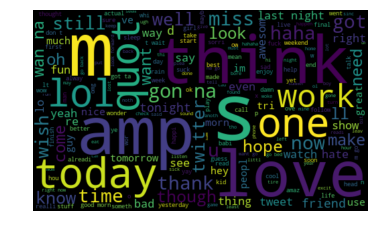

In [42]:
allWords= ' '.join([twts for twts in df['new_tweet']])
wordCloud = WordCloud(width=500,height=300, random_state=21, max_font_size=120).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Train_test_split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
df_train, df_test =  train_test_split(df, test_size = 0.3, stratify = df['sentiment'], random_state = 21)

In [40]:
df_train.shape

(560000, 8)

In [41]:
df_test.shape

(240001, 8)

## Word to vector

In [42]:
tfidf_vector = TfidfVectorizer(lowercase=True, max_features=1000, stop_words=ENGLISH_STOP_WORDS)
tfidf_vector.fit(df_train.new_tweet)
tfidf_vector.fit(df_test.new_tweet)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=frozenset({'among', 'nor', 'becomes', 'towards', 'wherever', 'formerly', 'rather', 'whatever', 'who', 'seems', 'until', 'over', 'seem', 'yet', 'front', 'although', 'forty', 'un', 'perhaps', 'against', 'five', 'seemed', 'whereas', 'why', 'of', 'somewhere', 'next', 'found', 'latterly', 'amo...'least', 'hereupon', 'throughout', 'above', 'toward', 'afterwards', 'therein', 'hereby', 'couldnt'}),
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [43]:
train_idf = tfidf_vector.transform(df_train.new_tweet)
test_idf = tfidf_vector.transform(df_test.new_tweet)

## Training the model

In [44]:
model = RandomForestClassifier(n_estimators=20)
model.fit(train_idf,df_train.sentiment)
predict_train = model.predict(train_idf)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
print("Accuracy Score of train model : ", accuracy_score(df_train.sentiment,predict_train))

Accuracy Score of train model :  0.9361321428571429


In [47]:
predict_test = model.predict(test_idf)

In [48]:
print("Accuracy Score of test model : ", accuracy_score(df_test.sentiment,predict_test))

Accuracy Score of test model :  0.73177611759951


In [63]:
import seaborn as sb

In [71]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(df_train.sentiment, predict_train)

Confusion Matrix of Train model:


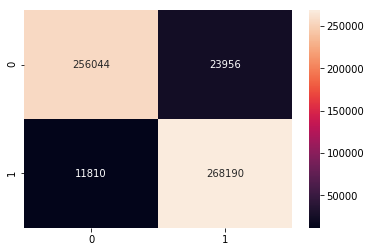

In [72]:
sb.heatmap(cm1, annot=True, fmt='d')
print("Confusion Matrix of Train model:")
plt.show()

In [73]:
cm2 = confusion_matrix(df_test.sentiment, predict_test)

Confusion Matrix of Test model:


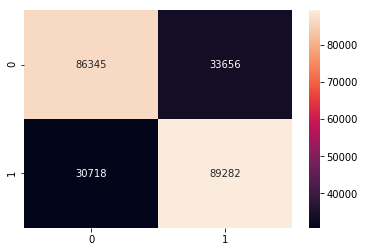

In [67]:
sb.heatmap(cm2, annot=True, fmt='d')
print("Confusion Matrix of Test model:")
plt.show()

# Pipeline

In [54]:
pipeline = Pipeline(steps = [('tfidf', TfidfVectorizer(lowercase=True, max_features=1000,stop_words= ENGLISH_STOP_WORDS)),
                             ('model', RandomForestClassifier(n_estimators=100))])
pipeline.fit(df_train.new_tweet, df_train.sentiment)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [68]:
p_predict_train = pipeline.predict(df_train.new_tweet)

In [78]:
print("Accuracy of pipeline model(Train): ", accuracy_score(df_train.sentiment,p_predict_train))

Accuracy of pipeline model(Train):  0.9402107142857142


0.9402107142857142

In [74]:
cmpt = confusion_matrix(df_train.sentiment, p_predict_train)

Confusion Matrix of Test model:


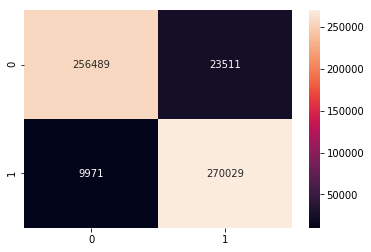

In [75]:
print("Confusion Matrix of Test model:")
sb.heatmap(cmpt, annot=True, fmt='d')
plt.show()

In [58]:
p_predict = pipeline.predict(df_test.new_tweet)

In [59]:
p_predict

array([4, 4, 0, ..., 4, 4, 4], dtype=int64)

In [79]:
print("Accuracy of pipeline model(Test): ", accuracy_score(df_test.sentiment,p_predict))

Accuracy of pipeline model(Test):  0.7383844233982358


In [76]:
cmp = confusion_matrix(df_test.sentiment, p_predict)

Confusion Matrix of pipeline model(Test):


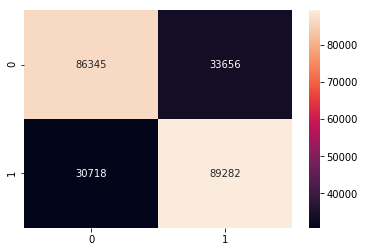

In [70]:
print("Confusion Matrix of pipeline model(Test):")
sb.heatmap(cm2, annot=True, fmt='d')
plt.show()

## Grid Search CV

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
tuned_parameters = { 'criterion': ['gini', 'entropy'], 
                    'max_depth': [4,5,8,10,15,20], 
                    'max_features': [2,5,10],
                     'n_estimators': [10,15,20]
                   }

In [56]:
model_gscv = RandomForestClassifier()

In [57]:
model_rf = GridSearchCV(estimator=model_gscv,param_grid=tuned_parameters, cv =10, scoring='accuracy')

In [58]:
model_rf.fit(train_idf,df_train.sentiment)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 8, 10, 15, 20], 'max_features': [2, 5, 10], 'n_estimators': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [60]:
model_rf.best_score_

0.7037910714285714

In [62]:
model_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 10,
 'n_estimators': 20}

In [64]:
df_train2, df_test2 =  train_test_split(df, test_size = 0.3, stratify = df['sentiment'], random_state = 21)

In [65]:
tfidf_vector2 = TfidfVectorizer(lowercase=True, max_features=1000, stop_words=ENGLISH_STOP_WORDS)
tfidf_vector2.fit(df_train2.new_tweet)
tfidf_vector2.fit(df_test2.new_tweet)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=frozenset({'up', 'thick', 'everyone', 'without', 'once', 'thereby', 'were', 'before', 'system', 'four', 'only', 'now', 'get', 'call', 'eight', 'has', 'can', 'rather', 'anyhow', 'among', 'beforehand', 'been', 'five', 'formerly', 'thru', 'latterly', 'between', 'any', 'less', 'will', 'mine',...nother', 'almost', 'down', 'most', 'amount', 'have', 'six', 'somewhere', 'ten', 'besides', 'where'}),
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [67]:
train_idf2 = tfidf_vector2.transform(df_train2.new_tweet)
test_idf2 = tfidf_vector2.transform(df_test2.new_tweet)

In [74]:
final_model = RandomForestClassifier(criterion='entropy', max_depth=20, max_features=10, n_estimators=20)
final_model.fit(train_idf2,df_train2.sentiment)
predict_train2 = final_model.predict(train_idf2)

In [75]:
print("Accuracy Score of train model : ", accuracy_score(df_train2.sentiment,predict_train2))

Accuracy Score of train model :  0.7087946428571429


In [76]:
predict_test2 = final_model.predict(test_idf2)

In [77]:
print("Accuracy Score of test model : ", accuracy_score(df_test2.sentiment,predict_test2))

Accuracy Score of test model :  0.7022720738663589
